In [35]:
# Read in the data from the data folder
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx

spbase = pd.read_csv('../../spambase.csv')
spbase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [36]:
# Check the number of rows and columns in the data
spbase.shape

(4601, 58)

In [37]:
spbase.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [38]:
spbase['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [39]:
#drop the unrelated 
# dropList = ['file_name', 'pos_z', 'pos_noise_z','spd_z','spd_noise_z','acl_z','acl_noise_z','hed_z','hed_noise_z','type','density_level','messageID']
# trafic.drop(dropList, axis=1, inplace=True)
# spbase.head()

In [40]:
#look at the general distribution of data
spbase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [41]:
spbase.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


In [42]:
corr_matrix = spbase.corr()

# Assuming you have a correlation matrix stored in a Pandas DataFrame called 'corr_matrix'
# Calculate absolute correlation values
abs_corr_matrix = corr_matrix.abs()

# Find pairs of attributes with correlation greater than 0.5
high_corr_pairs = (abs_corr_matrix > 0.5).stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs[0]]
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] < high_corr_pairs['level_1']]

# Print out the list of attribute pairs with high correlation
for index, row in high_corr_pairs.iterrows():
    print(f"{row['level_0']} and {row['level_1']}")


word_freq_hp and word_freq_hpl
word_freq_650 and word_freq_labs
word_freq_650 and word_freq_telnet
word_freq_650 and word_freq_857
word_freq_650 and word_freq_85
word_freq_650 and word_freq_technology
word_freq_650 and word_freq_direct
word_freq_labs and word_freq_telnet
word_freq_labs and word_freq_technology
word_freq_857 and word_freq_lab
word_freq_857 and word_freq_labs
word_freq_857 and word_freq_telnet
word_freq_857 and word_freq_technology
word_freq_857 and word_freq_direct
word_freq_415 and word_freq_650
word_freq_415 and word_freq_lab
word_freq_415 and word_freq_labs
word_freq_415 and word_freq_telnet
word_freq_415 and word_freq_857
word_freq_415 and word_freq_85
word_freq_415 and word_freq_technology
word_freq_415 and word_freq_direct
word_freq_85 and word_freq_labs
word_freq_85 and word_freq_telnet
word_freq_85 and word_freq_857
word_freq_85 and word_freq_technology
word_freq_85 and word_freq_direct
word_freq_technology and word_freq_telnet
word_freq_direct and word_freq_lab

In [34]:
# Assuming you have a correlation matrix stored in a Pandas DataFrame called 'corr_matrix'
# Find pairs of attributes with correlation greater than 0.5
corr_matrix = spbase.corr()
high_corr_pairs = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if ((corr_matrix.loc[idx, col] > 0.5) or (corr_matrix.loc[idx, col] < -0.5) ) and (idx != col):
            corr_value = corr_matrix.loc[idx, col]
            corr_sign = "positive" if corr_value > 0 else "negative"
            high_corr_pairs.append((idx, col, corr_value, corr_sign))

# Print out the list of attribute pairs with high correlation
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]} ({pair[3]} correlation)")


word_freq_hpl and word_freq_hp: 0.5172930200397092 (positive correlation)
word_freq_hp and word_freq_hpl: 0.5172930200397092 (positive correlation)
word_freq_labs and word_freq_650: 0.5532997415574401 (positive correlation)
word_freq_telnet and word_freq_650: 0.518869823910832 (positive correlation)
word_freq_857 and word_freq_650: 0.5593490484808276 (positive correlation)
word_freq_415 and word_freq_650: 0.5575725596237302 (positive correlation)
word_freq_85 and word_freq_650: 0.5815176449349388 (positive correlation)
word_freq_technology and word_freq_650: 0.5651623368550426 (positive correlation)
word_freq_direct and word_freq_650: 0.5101649808409124 (positive correlation)
word_freq_857 and word_freq_lab: 0.5060151519220756 (positive correlation)
word_freq_415 and word_freq_lab: 0.5042331244363727 (positive correlation)
word_freq_650 and word_freq_labs: 0.5532997415574401 (positive correlation)
word_freq_telnet and word_freq_labs: 0.607214071844769 (positive correlation)
word_freq_8

<Axes: >

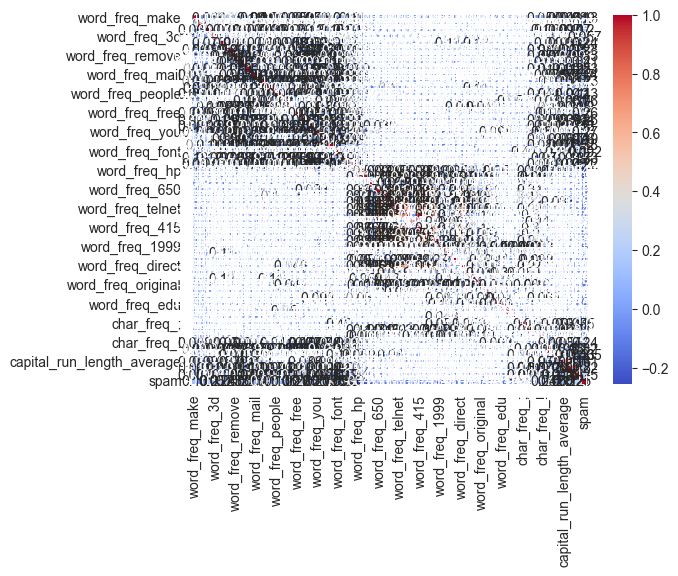

In [43]:
#look at the correlation
corr_matrix = spbase.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


<Axes: >

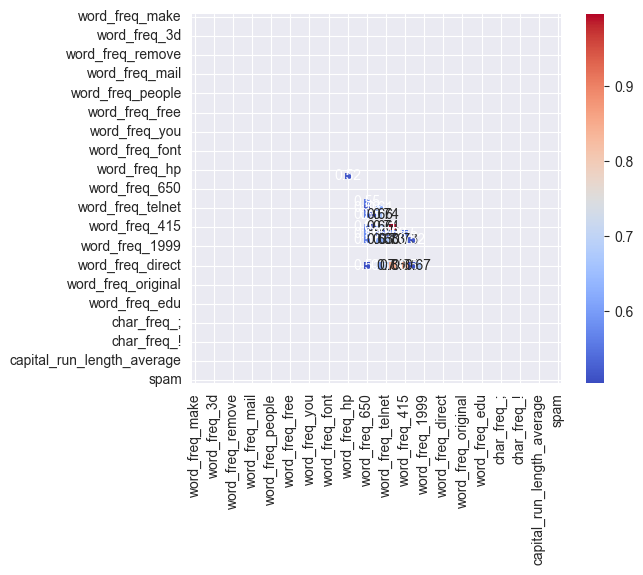

In [44]:
#look at the correlation
corr_matrix = spbase.corr()
corr_threshold = 0.5

# Create a mask to hide the upper triangle of the matrix
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix[(corr_matrix >= corr_threshold) | (corr_matrix <= -corr_threshold)],
            cmap='coolwarm', annot=True, mask=mask, square=True)

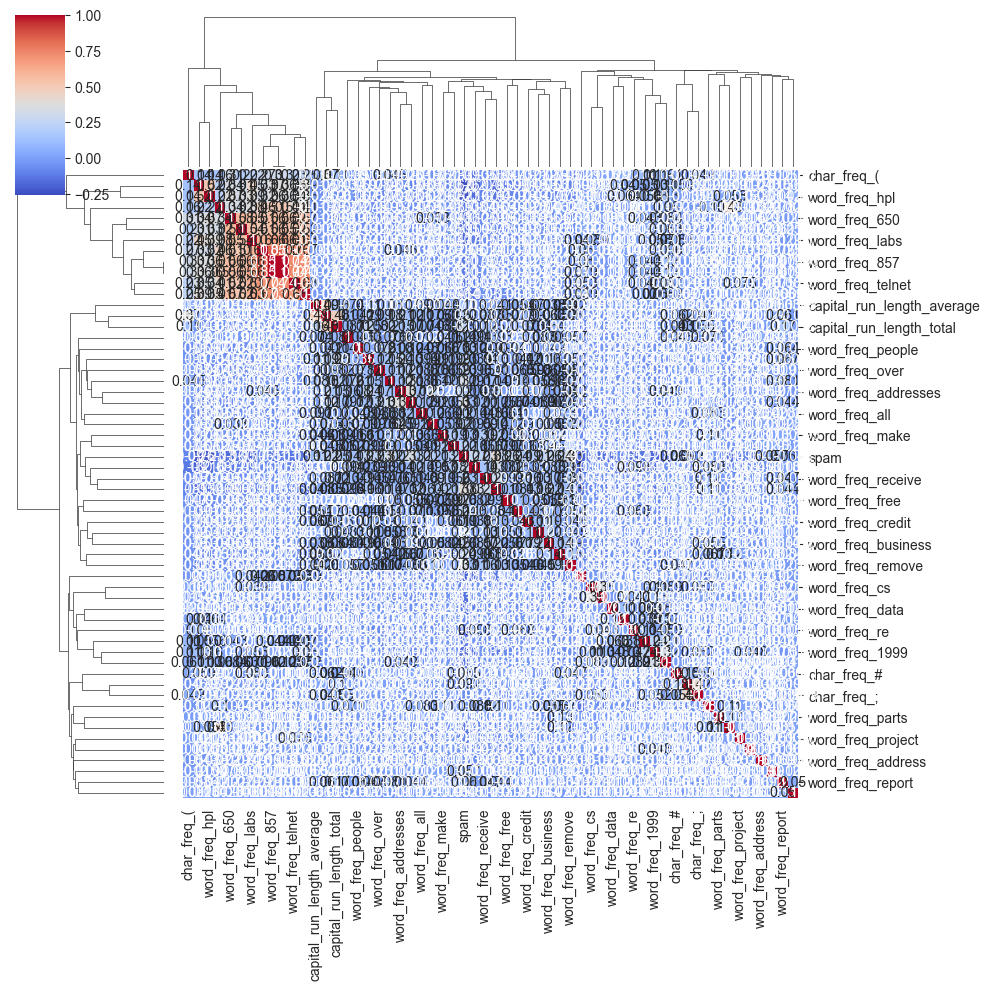

In [45]:
# Calculate the correlation matrix
corr_matrix = spbase.corr()

# Create a clustered heatmap using Seaborn
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True)


In [46]:

from scipy import stats
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(spbase.groupby('spam')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    spam = spbase[spbase['spam']==1][feature]
    not_spam = spbase[spbase['spam']==0][feature]
    tstat, pval = stats.ttest_ind(spam, not_spam, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [10]:

related_features = spbase.columns
for feature in related_features:
    describe_cont_feature(feature)


*** Results for word_freq_make ***
       count      mean       std  min  25%  50%   75%   max
spam                                                       
0     2788.0  0.073479  0.297838  0.0  0.0  0.0  0.00  4.34
1     1813.0  0.152339  0.310645  0.0  0.0  0.0  0.17  4.54
t-statistic: 8.6, p-value: 1.75e-17
None

*** Results for word_freq_address ***
       count      mean       std  min  25%  50%   75%    max
spam                                                        
0     2788.0  0.244466  1.633223  0.0  0.0  0.0  0.00  14.28
1     1813.0  0.164650  0.348919  0.0  0.0  0.0  0.21   4.76
t-statistic: -2.5, p-value: 0.0127
None

*** Results for word_freq_all ***
       count      mean       std  min  25%  50%   75%  max
spam                                                      
0     2788.0  0.200581  0.502959  0.0  0.0  0.0  0.12  5.1
1     1813.0  0.403795  0.480725  0.0  0.0  0.3  0.64  3.7
t-statistic: 13.8, p-value: 4.16e-42
None

*** Results for word_freq_3d ***
       count 

C:\Users\esali\AppData\Local\Temp\ipykernel_13844\1890454329.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat, pval = stats.ttest_ind(spam, not_spam, equal_var=False)


C:\Users\esali\AppData\Local\Temp\ipykernel_13844\4113493321.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam, color='r', kde=False, bins=np.arange(xmin, xmax, width))
C:\Users\esali\AppData\Local\Temp\ipykernel_13844\4113493321.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_s

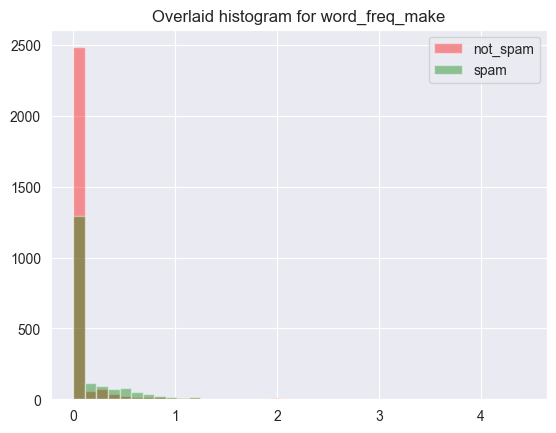

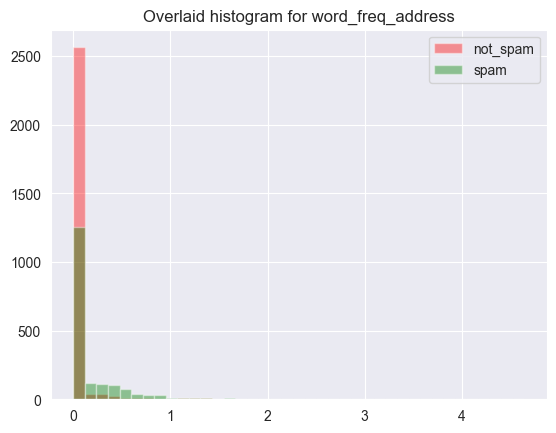

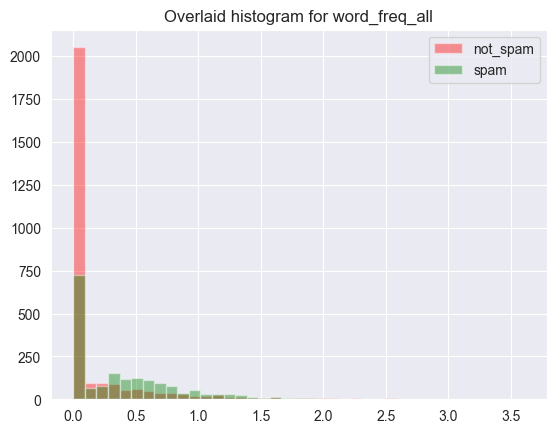

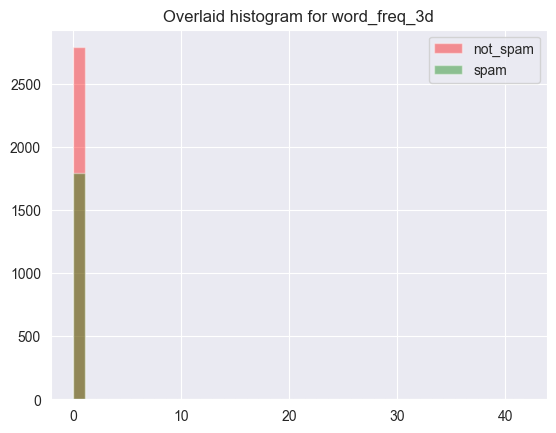

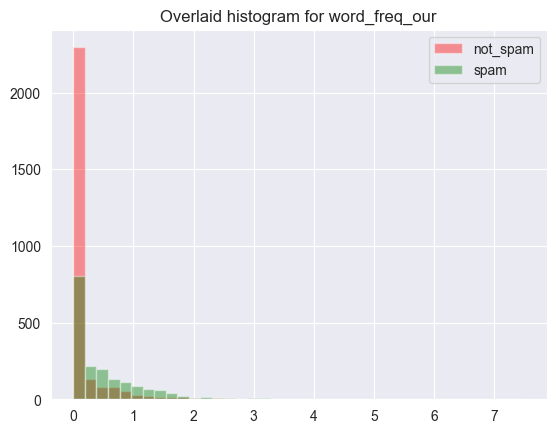

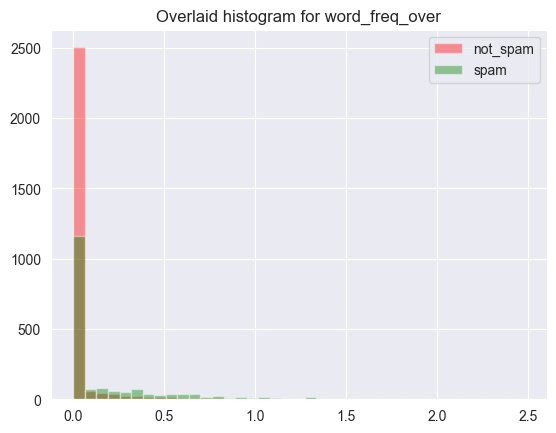

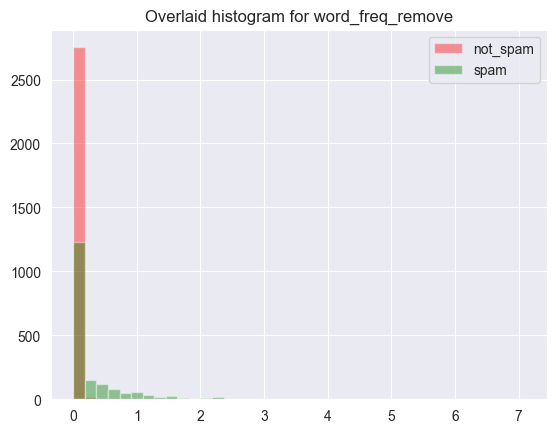

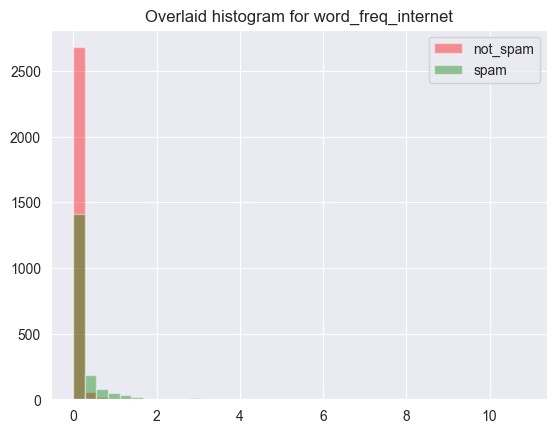

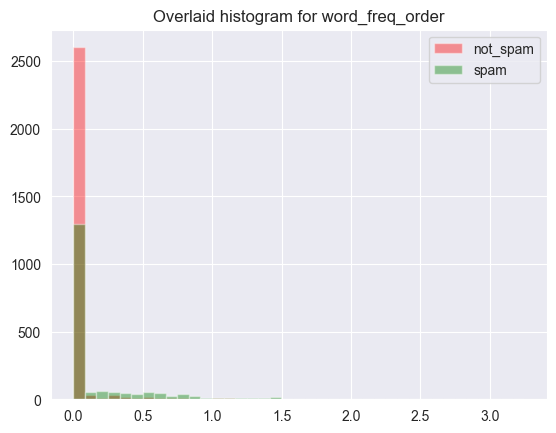

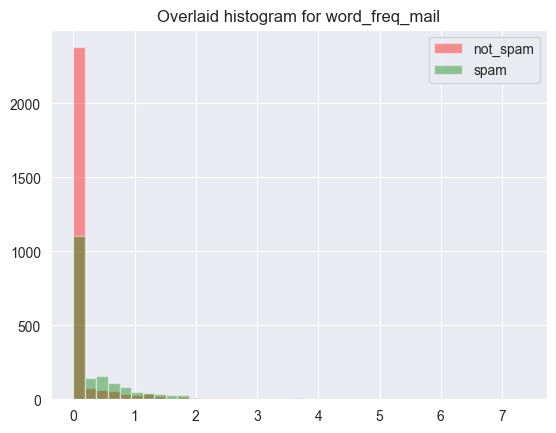

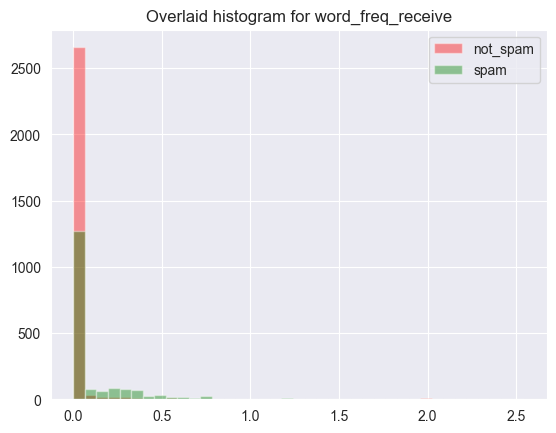

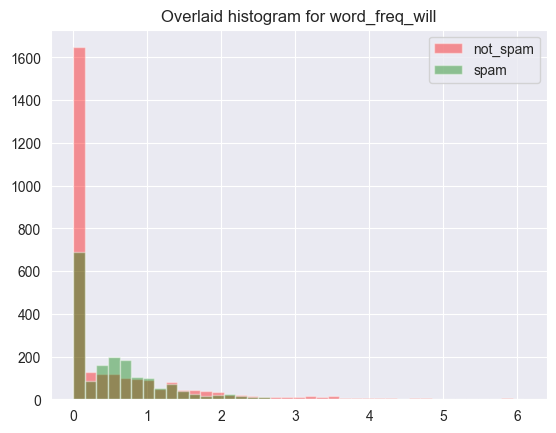

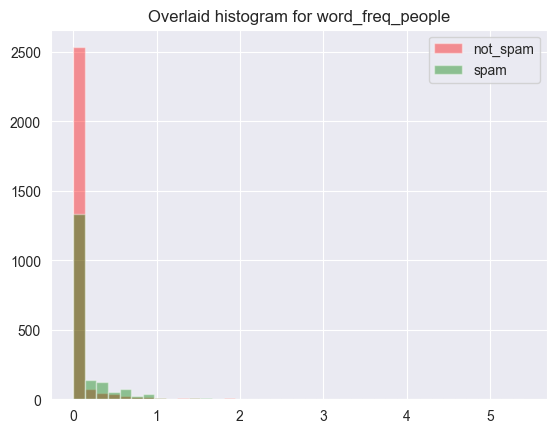

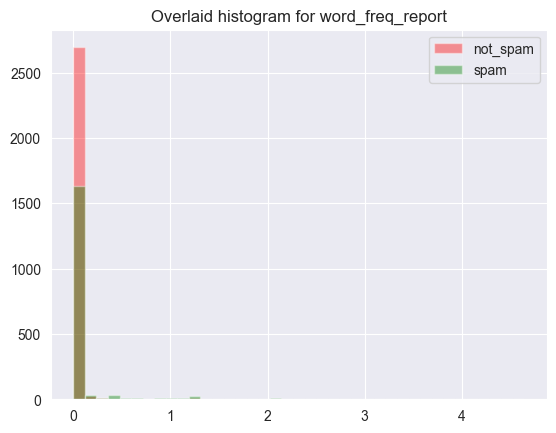

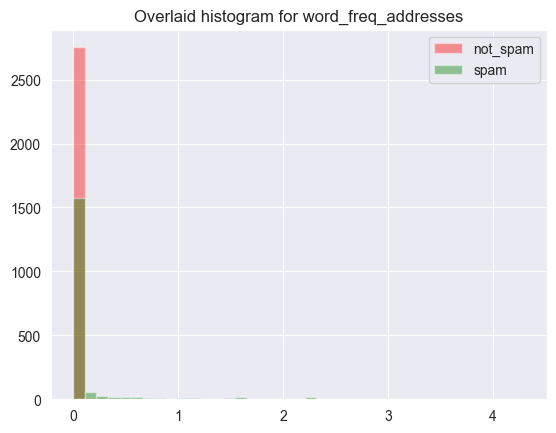

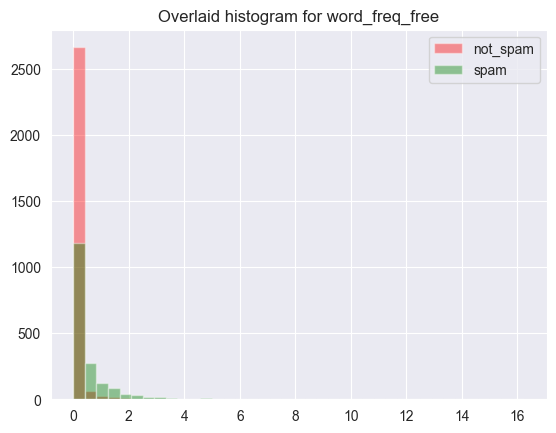

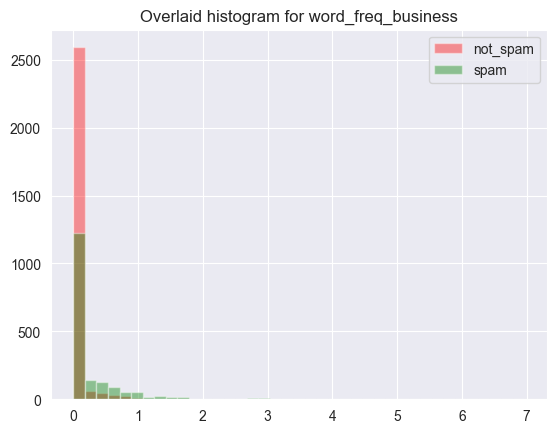

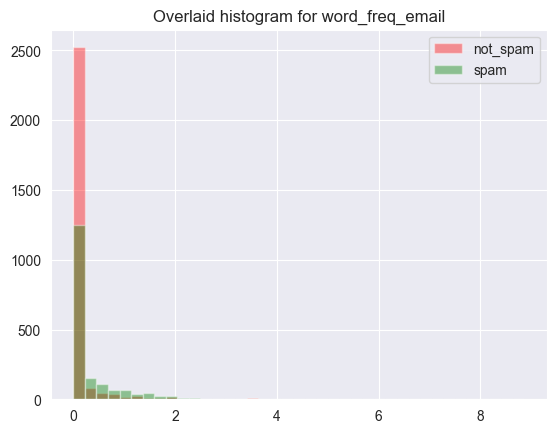

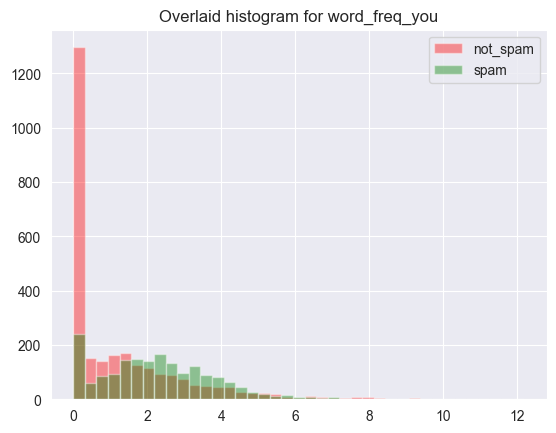

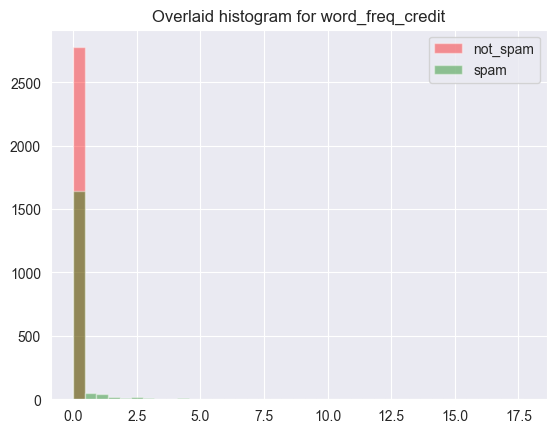

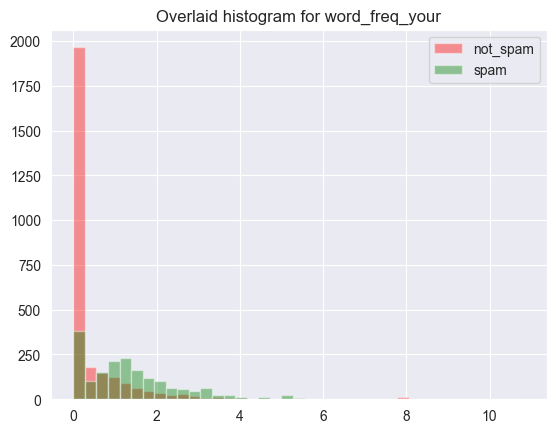

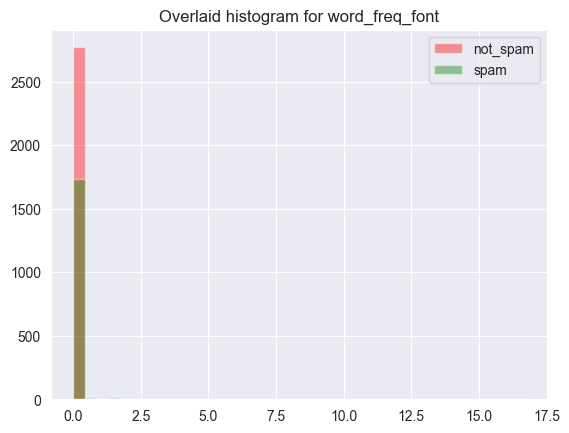

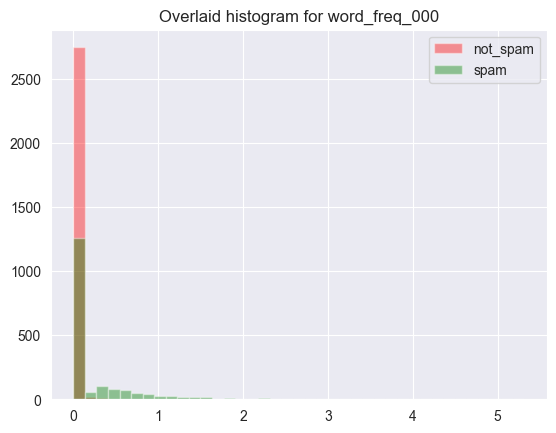

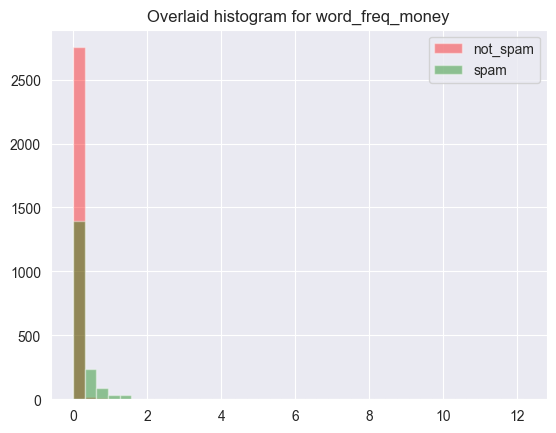

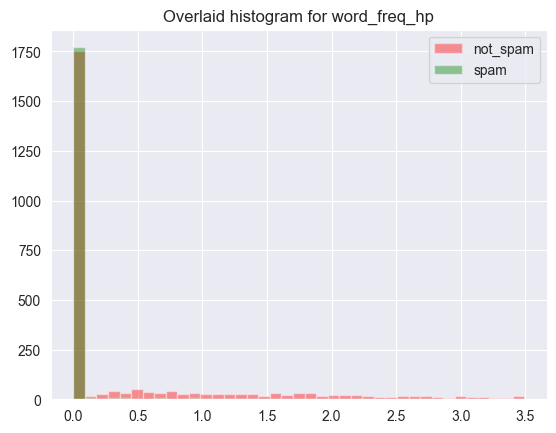

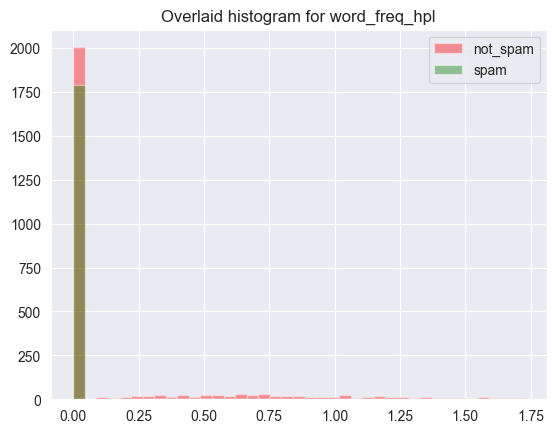

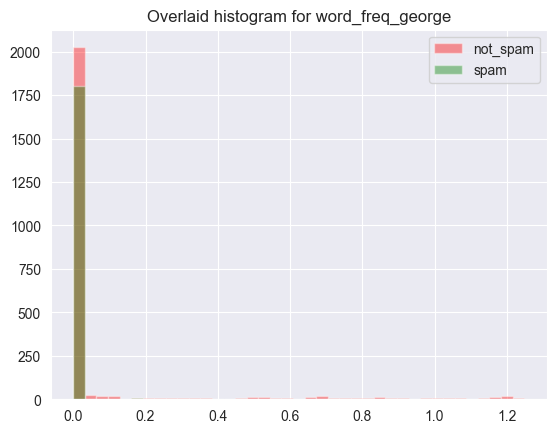

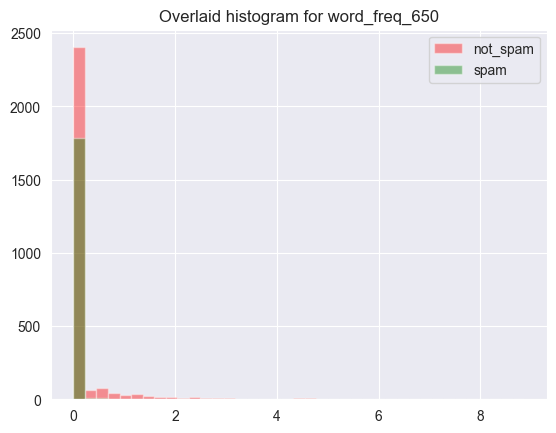

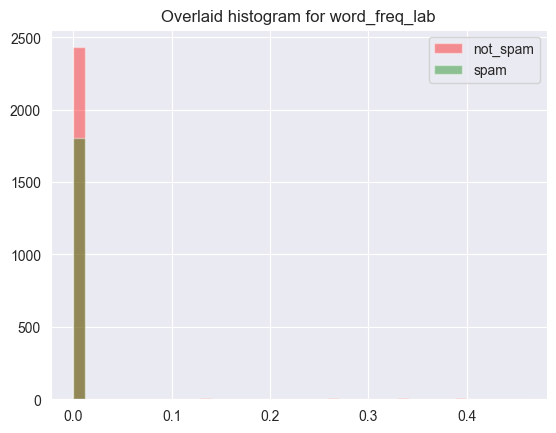

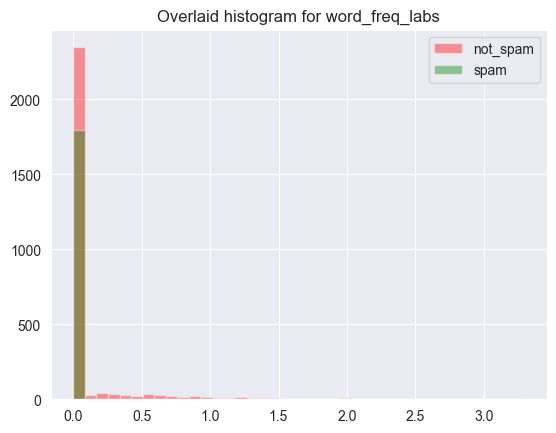

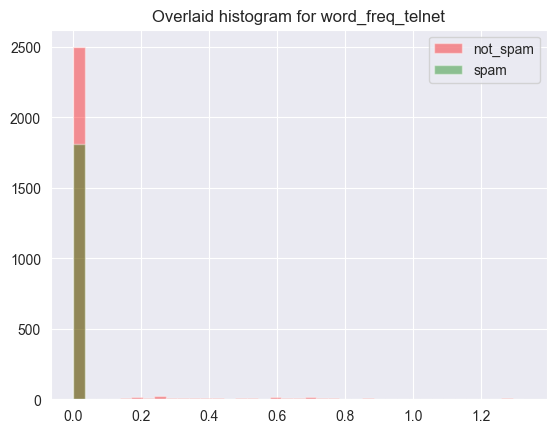

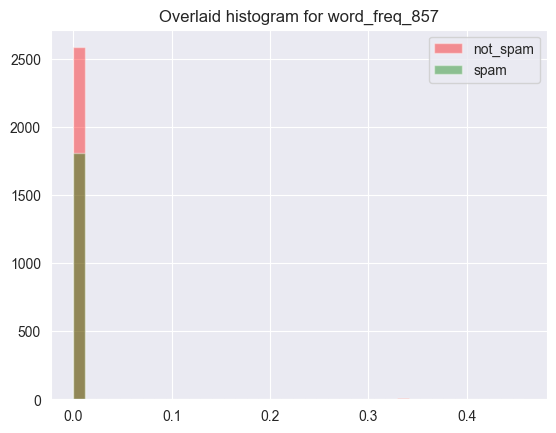

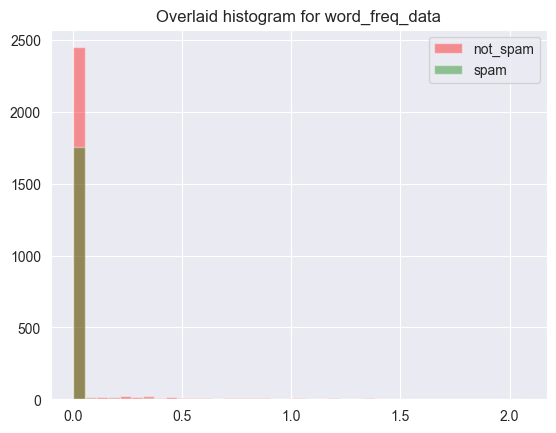

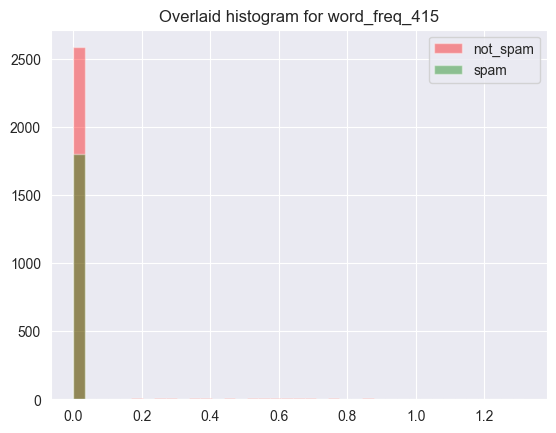

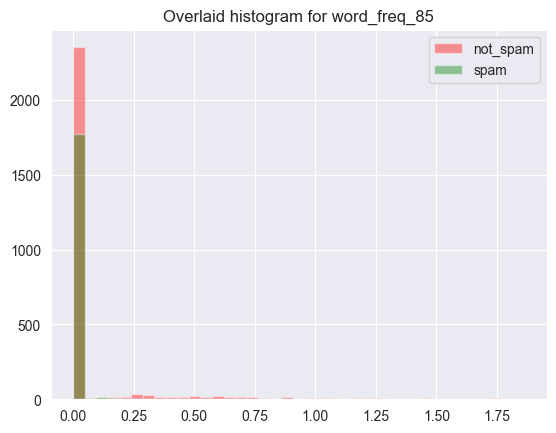

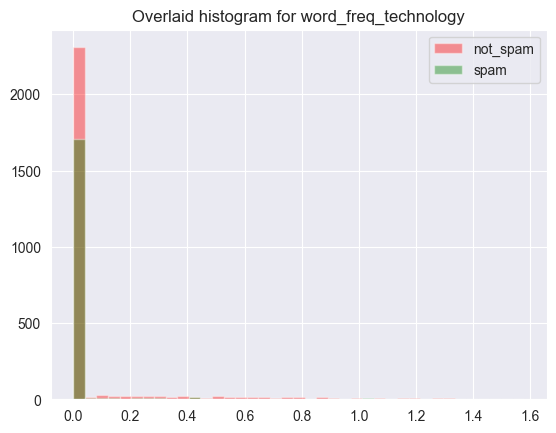

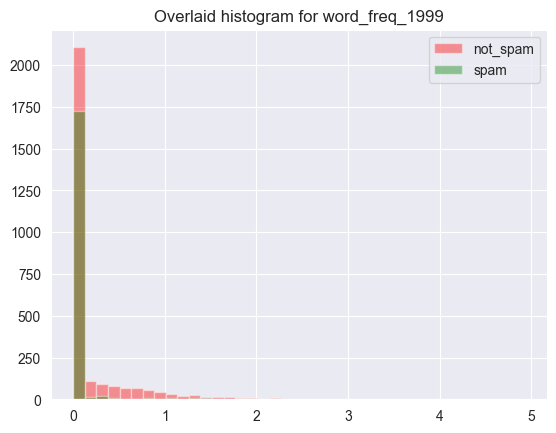

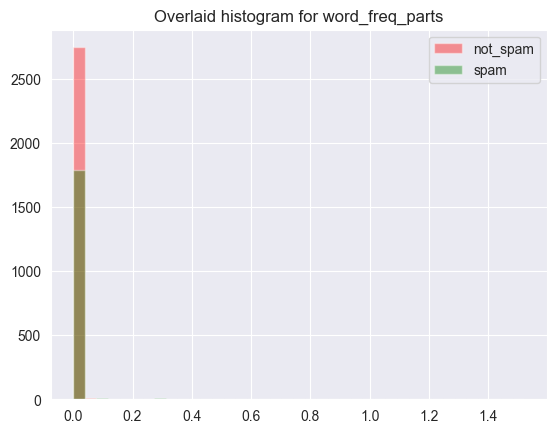

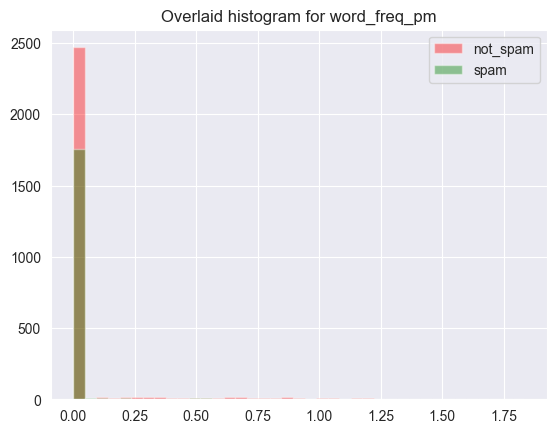

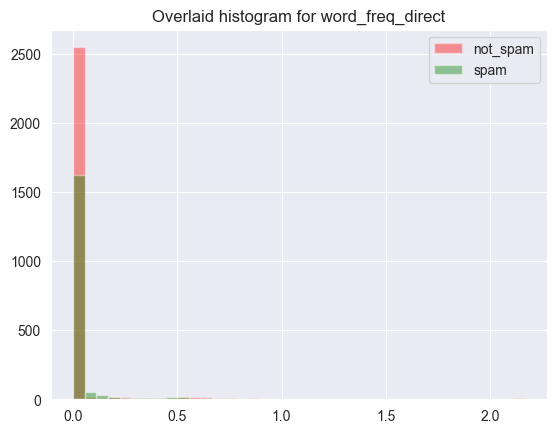

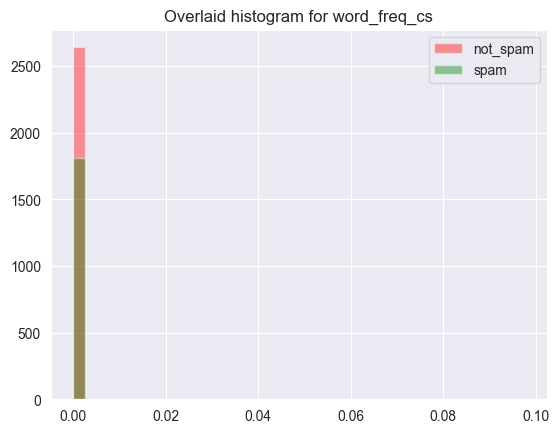

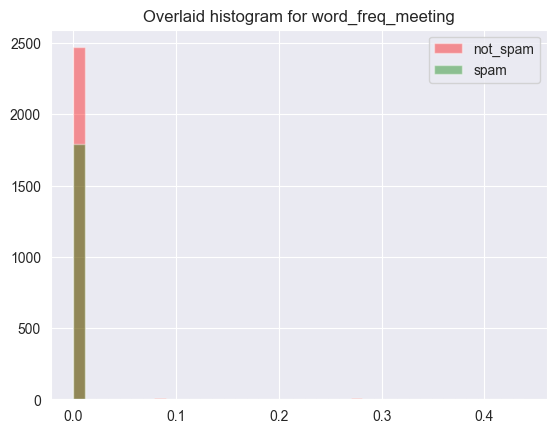

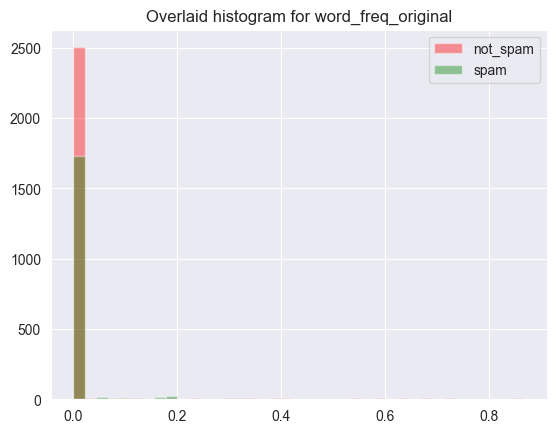

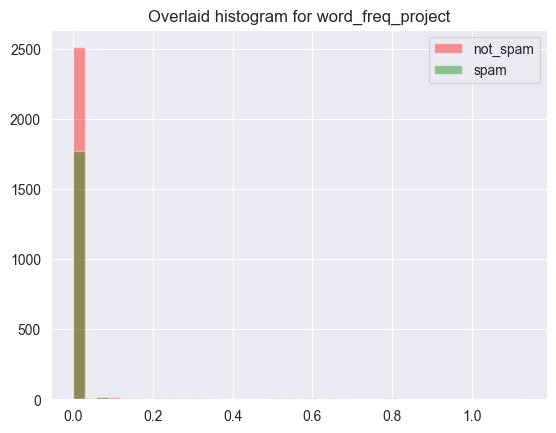

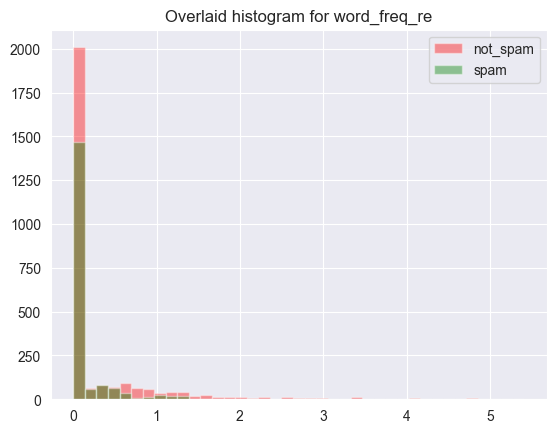

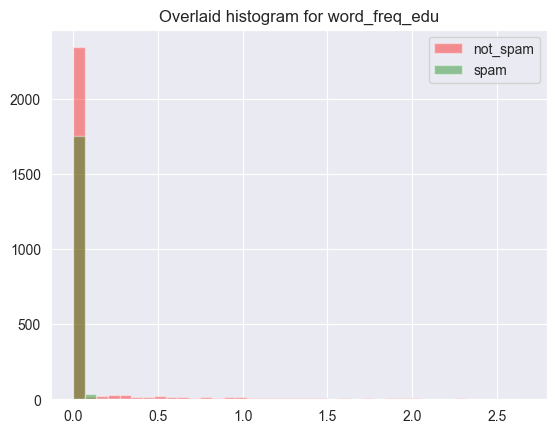

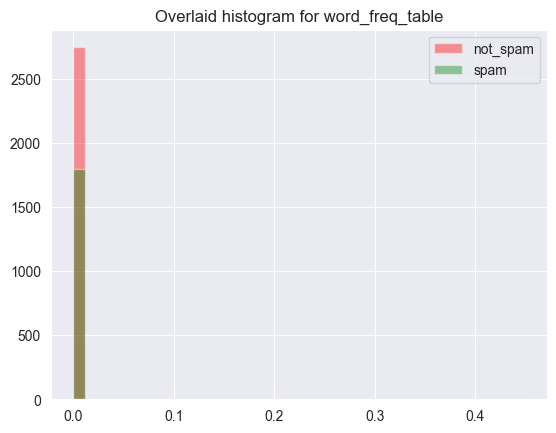

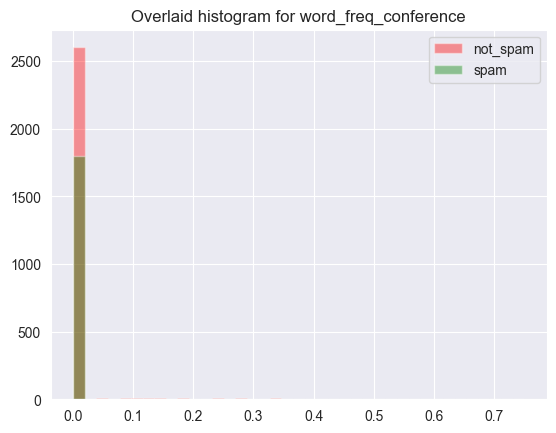

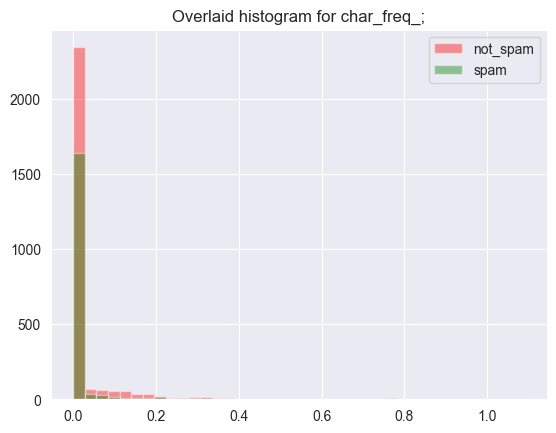

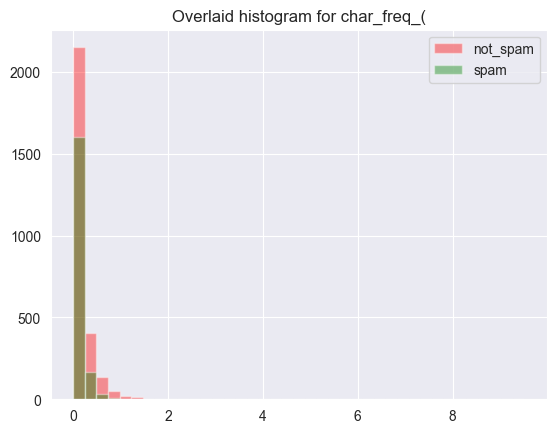

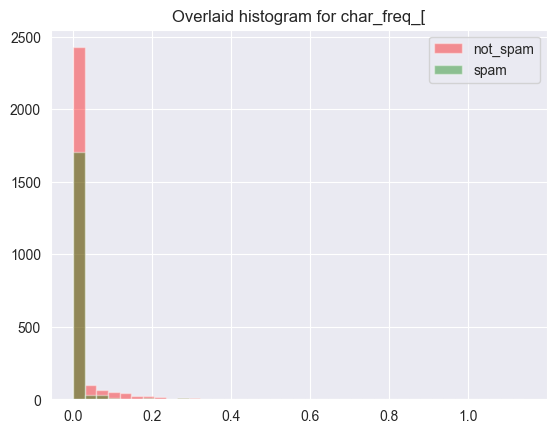

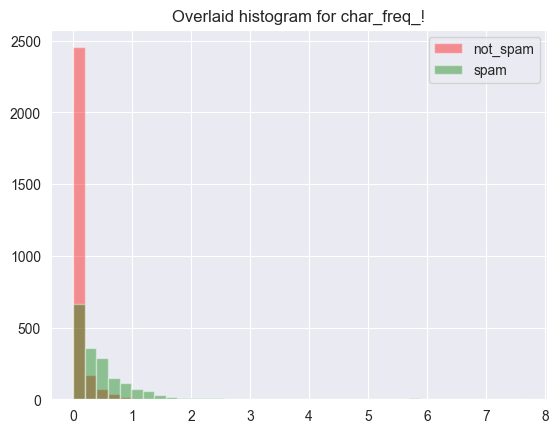

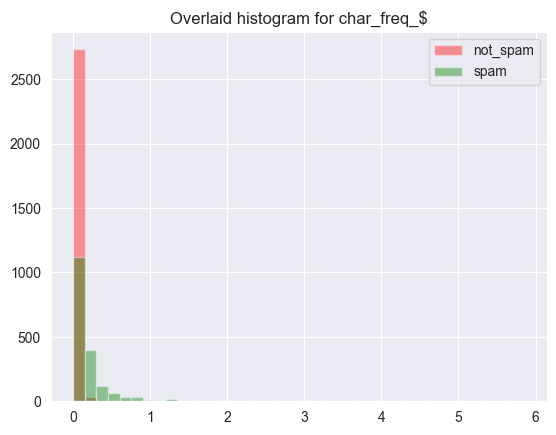

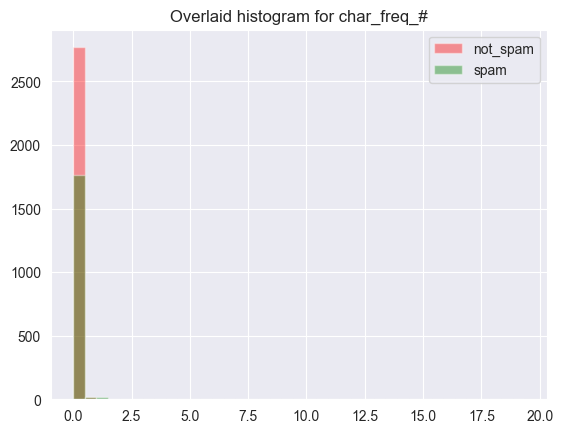

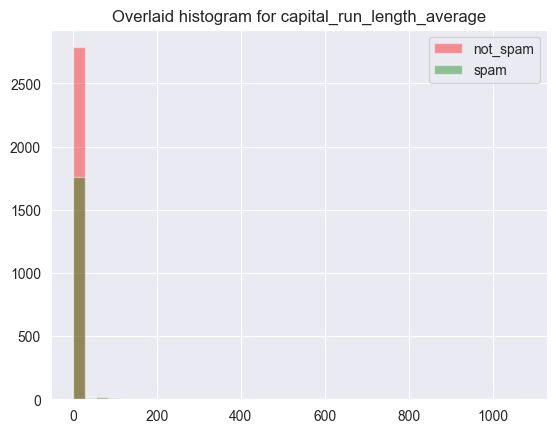

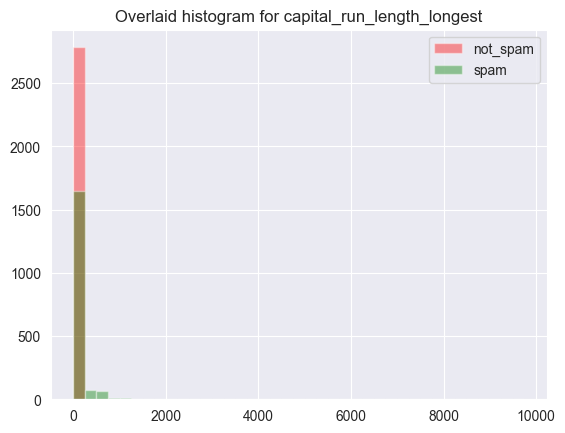

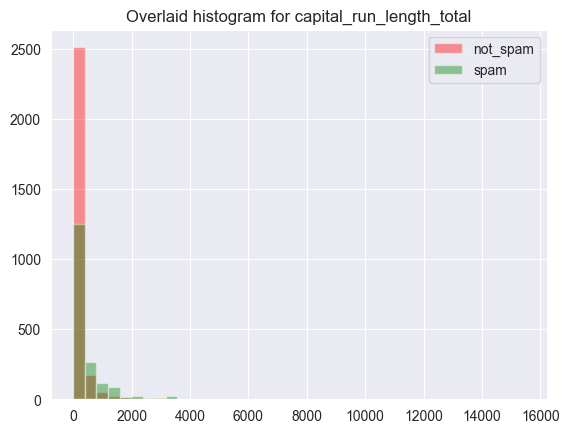

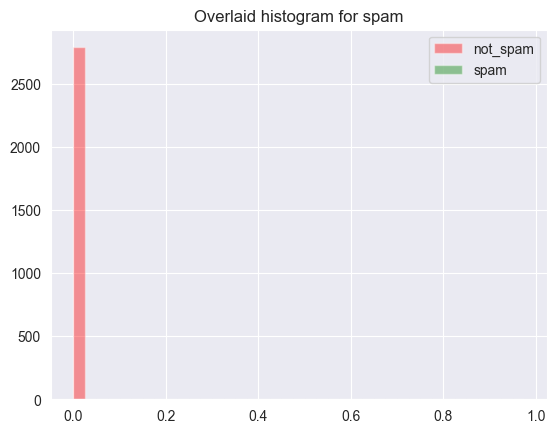

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

for i in related_features:
    spam = list(spbase[spbase['spam'] == 0][i].dropna())
    not_spam = list(spbase[spbase['spam'] == 1][i].dropna())
    xmin = min(min(spam), min(not_spam))
    xmax = max(max(not_spam), max(not_spam))
    width = (xmax - xmin) / 40
    sns.distplot(spam, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(not_spam, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['not_spam', 'spam'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()